<a href="https://colab.research.google.com/github/D-060103/TESSSS/blob/main/Glove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Dataset/dataset.csv"

# Membaca file CSV menjadi DataFrame
df = pd.read_csv(path)

Mounted at /content/drive


In [ ]:
# Melihat 5 data pertama
subset_columns = df.iloc[:, :2]
print(subset_columns.head())

   No                                              Title
0   0  Pembuatan Sistem Pengambilan Keputusan Penjual...
1   1  Pembuatan Aplikasi Pendidikan Bahasa Inggris G...
2   2  Optimasi Kapasitas Transportasi Pendistribusia...
3   3  Pembuatan Sistem Informasi Pariwisata di Treng...
4   4  Pembuatan Sistem Informasi Pemasaran dan Penju...


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Download data NLTK
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# Mengambil kolom title
text_column = df['Title']

In [ ]:
# Membersihkan text pada kolom
cleaned_text = text_column.apply(lambda x: re.sub(r'[^\w\s]', '', str(x)))

In [ ]:
# Tokenisasi teks
df['tokenized_text'] = cleaned_text.apply(word_tokenize)

In [ ]:
# Menghapus Stopword
stop_words = set(stopwords.words('indonesian'))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: ' '.join([word for word in x if word.lower() not in stop_words]))

In [ ]:
print(df[['Title', 'tokenized_text']].head())

                                               Title  \
0  Pembuatan Sistem Pengambilan Keputusan Penjual...   
1  Pembuatan Aplikasi Pendidikan Bahasa Inggris G...   
2  Optimasi Kapasitas Transportasi Pendistribusia...   
3  Pembuatan Sistem Informasi Pariwisata di Treng...   
4  Pembuatan Sistem Informasi Pemasaran dan Penju...   

                                      tokenized_text  
0  Pembuatan Sistem Pengambilan Keputusan Penjual...  
1  Pembuatan Aplikasi Pendidikan Bahasa Inggris G...  
2  Optimasi Kapasitas Transportasi Pendistribusia...  
3  Pembuatan Sistem Informasi Pariwisata Trenggal...  
4  Pembuatan Sistem Informasi Pemasaran Penjualan...  


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Buat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Terapkan stemming pada teks yang sudah di-tokenisasi
df['stemmed_text'] = df['tokenized_text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
print(df['stemmed_text'].head())

0    buat sistem ambil putus jual kendara kredit me...
1    buat aplikasi didik bahasa inggris grammer tin...
2    optimasi kapasitas transportasi distribusi bar...
3    buat sistem informasi pariwisata trenggalek ca...
4    buat sistem informasi pasar jual apartemen tam...
Name: stemmed_text, dtype: object


In [ ]:
# Simpan kolom 'stemmed_text' ke dalam file teks
df['stemmed_text'].to_csv('/content/drive/MyDrive/Dataset/dataset_preprocessed.txt', index=False, header=False, sep=' ')

In [ ]:
# Clone GloVe repository
!git clone https://github.com/stanfordnlp/GloVe.git

Cloning into 'GloVe'...
remote: Enumerating objects: 661, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 661 (delta 37), reused 47 (delta 32), pack-reused 592 (from 1)
Receiving objects: 100% (661/661), 248.05 KiB | 1.25 MiB/s, done.
Resolving deltas: 100% (375/375), done.


In [ ]:
# Masuk ke direktori GloVe
%cd GloVe

# Compile GloVe
!make

/content/GloVe
mkdir -p build
gcc -c src/vocab_count.c -o build/vocab_count.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
gcc -c src/cooccur.c -o build/cooccur.o -lm -pthread -O3 -march=native -funroll-loops -Wall -Wextra -Wpedantic
src/cooccur.c: In function ‘merge_files’:
src/cooccur.c:180:9: warning: ignoring return value of ‘fread’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
  180 |         fread(&new, sizeof(CREC), 1, fid[i]);
      |         ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:190:5: warning: ignoring return value of ‘fread’ declared with attribute ‘warn_unused_result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-result-Wunused-result]8;;]
  190 |     fread(&new, sizeof(CREC), 1, fid[i]);
      |     ^~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
src/cooccur.c:203:9: warning: ignoring return value of ‘fread’ d

In [ ]:
# Buat vocabulary dari dataset preprocessed
!./build/vocab_count -min-count 5 -verbose 2 < /content/drive/MyDrive/Dataset/dataset_preprocessed.txt > /content/vocab.txt

# Buat co-occurrence matrix dari dataset preprocessed
!./build/cooccur -memory 4.0 -vocab-file /content/vocab.txt -verbose 2 -window-size 15 < /content/drive/MyDrive/Dataset/dataset_preprocessed.txt > /content/cooccurrence.bin


BUILDING VOCABULARY
Processed 0 tokens.Processed 2683 tokens.
Counted 1052 unique words.
Truncating vocabulary at min count 5.
Using vocabulary of size 71.

COUNTING COOCCURRENCES
window size: 15
context: symmetric
max product: 13752509
overflow length: 38028356
Reading vocab from file "/content/vocab.txt"...loaded 71 words.
Building lookup table...table contains 5042 elements.
Processing token: 0Processed 2683 tokens.
Writing cooccurrences to disk....2 files in total.
Merging cooccurrence files: processed 0 lines.0 lines.Merging cooccurrence files: processed 1603 lines.



In [ ]:
# Latih model GloVe
!./build/glove -save-file /content/vectors -threads 8 -input-file /content/cooccurrence.bin -x-max 10 -iter 15 -vector-size 100 -binary 2 -vocab-file /content/vocab.txt

TRAINING MODEL
Read 1603 lines.
Initializing parameters...Using random seed 1733926142
done.
vector size: 100
vocab size: 71
x_max: 10.000000
alpha: 0.750000
12/11/24 - 02:09.02PM, iter: 001, cost: 0.135883
12/11/24 - 02:09.02PM, iter: 002, cost: 0.110711
12/11/24 - 02:09.02PM, iter: 003, cost: 0.100022
12/11/24 - 02:09.02PM, iter: 004, cost: 0.098015
12/11/24 - 02:09.02PM, iter: 005, cost: 0.096107
12/11/24 - 02:09.02PM, iter: 006, cost: 0.094825
12/11/24 - 02:09.02PM, iter: 007, cost: 0.093644
12/11/24 - 02:09.02PM, iter: 008, cost: 0.092922
12/11/24 - 02:09.02PM, iter: 009, cost: 0.092566
12/11/24 - 02:09.02PM, iter: 010, cost: 0.091550
12/11/24 - 02:09.02PM, iter: 011, cost: 0.090400
12/11/24 - 02:09.02PM, iter: 012, cost: 0.089764
12/11/24 - 02:09.02PM, iter: 013, cost: 0.088615
12/11/24 - 02:09.02PM, iter: 014, cost: 0.087810
12/11/24 - 02:09.02PM, iter: 015, cost: 0.085108


In [ ]:
import numpy as np

# Fungsi untuk memuat model GloVe yang sudah dilatih
def load_glove_model(file_path):
    glove_model = {}
    with open(file_path, 'r', encoding="utf-8") as f:
        for line in f:
            split_line = line.split()
            word = split_line[0]
            embedding = np.array(split_line[1:], dtype=float)
            glove_model[word] = embedding
    return glove_model

# Memuat vektor GloVe dari file vectors.txt
glove_model = load_glove_model('/content/vectors.txt')

In [ ]:
# Mengambil semua kata dari glove_model
words_to_visualize = list(glove_model.keys())

In [ ]:
# Mengambil embedding vektor untuk semua kata
word_vectors = np.array([glove_model[word] for word in words_to_visualize])

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
# Reduksi dimensi menggunakan t-SNE
tsne = TSNE(n_components=2, random_state=42)
reduced_vectors = tsne.fit_transform(word_vectors)

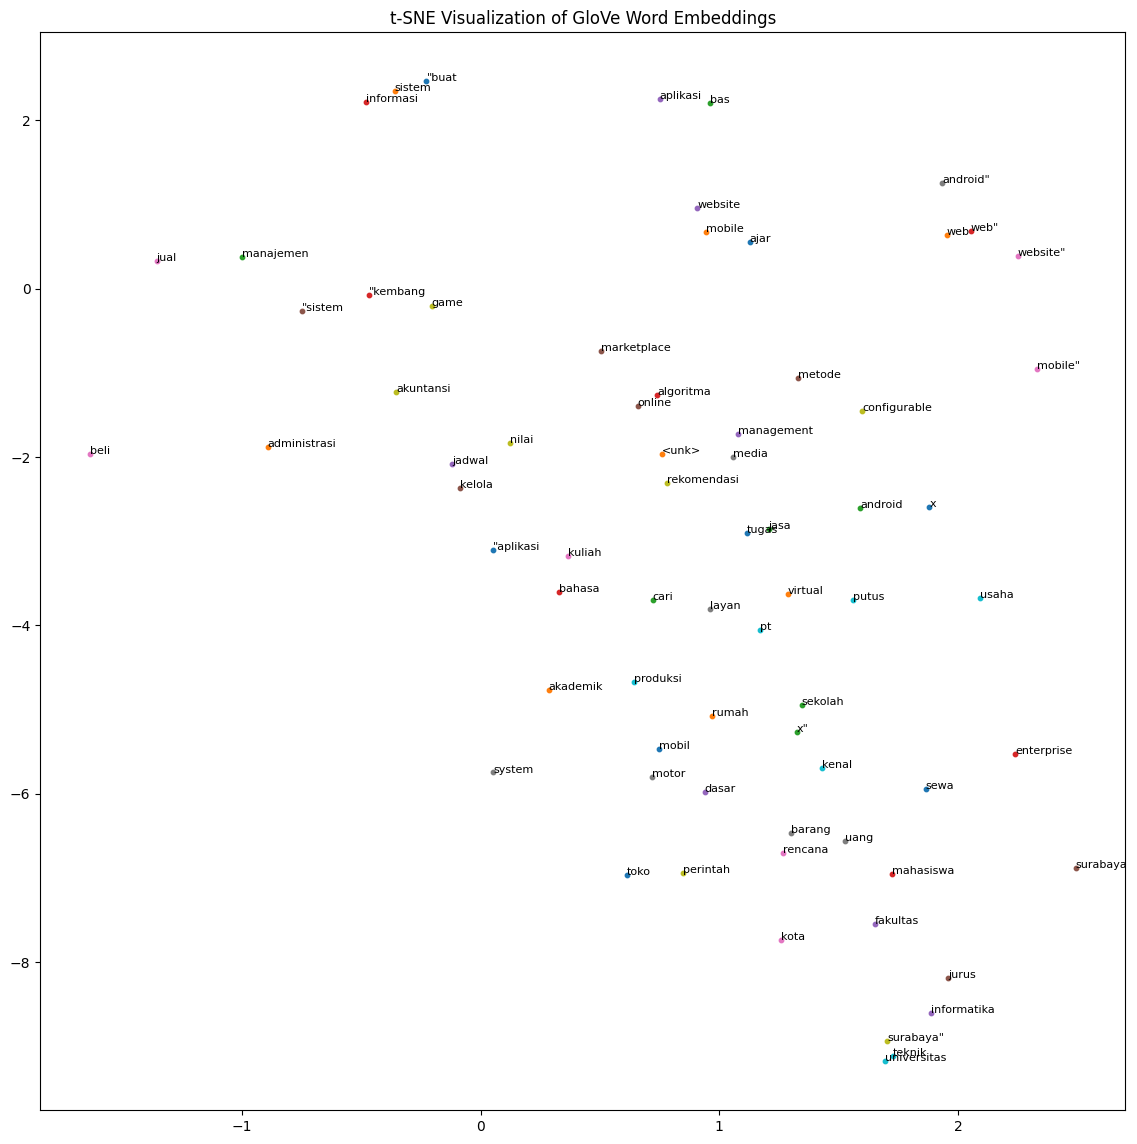

In [ ]:
import matplotlib.pyplot as plt

# Visualisasi hasil t-SNE
plt.figure(figsize=(14, 14))
for i, word in enumerate(words_to_visualize):
    plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1], s=10)  # Ukuran titik
    plt.text(reduced_vectors[i, 0], reduced_vectors[i, 1], word, fontsize=8)  # Ukuran font teks

plt.title('t-SNE Visualization of GloVe Word Embeddings')
plt.show()

In [ ]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [ ]:
# Memastikan bahwa model Glove sudah dimuat dengan baik
glove_model = load_glove_model('/content/vectors.txt')

In [ ]:
# Membuat fungsi untuk mendapatkan vektor dokumen dari rata-rata vektor kata (menggunakan GloVe)
def document_vector_glove(doc):
    # Ambil hanya kata-kata yang ada dalam model GloVe
    words = [glove_model[word] for word in doc.split() if word in glove_model]

    # Jika tidak ada kata yang dikenali oleh GloVe, kembalikan vektor nol
    if len(words) == 0:
        return np.zeros(100)  # Misal vektor GloVe memiliki dimensi 100

    return np.mean(words, axis=0)

In [ ]:
# Mengonversi semua dokumen menjadi vektor dokumen menggunakan GloVe
doc_vectors_glove = np.array([document_vector_glove(doc) for doc in df['stemmed_text']])

In [ ]:
# Memastikan vektor dokumen berhasil dibuat
print(f"Vektor dokumen pertama: {doc_vectors_glove[0]}")
print(f"Shape dari vektor dokumen: {doc_vectors_glove.shape}")

Vektor dokumen pertama: [-0.01282525 -0.0102525  -0.00178     0.0001435  -0.0148555   0.00882475
  0.039586    0.016713   -0.01533825  0.01573625 -0.0110455  -0.006955
 -0.04942825 -0.00833925  0.02675875  0.0188575  -0.035902    0.01743925
 -0.02839175  0.04296175  0.021429    0.00200375  0.01353525 -0.0004245
 -0.04664125 -0.01541075 -0.009829   -0.00830125 -0.0559495   0.013252
 -0.01962125 -0.01632875  0.005107   -0.01153275  0.040691    0.021577
  0.02195925  0.03320075  0.00091975  0.02350375 -0.00937025 -0.0132735
  0.0257415   0.04270425 -0.0250325  -0.0562475   0.05601575  0.00290225
  0.00107625  0.017192    0.03266775  0.00310525 -0.0419925  -0.0199375
  0.0340685  -0.03444875  0.039516   -0.011925   -0.05310475 -0.03285175
  0.02965125  0.0219055   0.033333    0.037614    0.0056685   0.016876
  0.06975875 -0.016751    0.05793675 -0.019562    0.02586975  0.0125845
  0.011371    0.03499825 -0.081567   -0.02221425  0.0053505   0.02933925
  0.03758975  0.00361825  0.02218025  0

In [ ]:
# Standarisasi vektor dokumen
scaler = StandardScaler()
doc_vectors_glove_scaled = scaler.fit_transform(doc_vectors_glove)

In [ ]:
# Aplikasi LSA (TruncatedSVD)
n_topics = 5  # Jumlah topik yang ingin dihasilkan
lsa_model = TruncatedSVD(n_components=n_topics, random_state=42)
lsa_topic_matrix = lsa_model.fit_transform(doc_vectors_glove_scaled)

In [ ]:
# Menampilkan topik yang dihasilkan dari LSA
vocab = list(glove_model.keys())  # Mengambil daftar kata dari GloVe
n_top_words = 10  # Jumlah kata terpenting yang ingin ditampilkan dari setiap topik

for i, topic in enumerate(lsa_model.components_):
    print(f"Topik {i}:")
    # Mengambil indeks kata dengan kontribusi tertinggi, pastikan tidak melebihi panjang vocab
    top_words_idx = [idx for idx in topic.argsort()[:-n_top_words - 1:-1] if idx < len(vocab)]
    top_words = [vocab[i] for i in top_words_idx]  # Mendapatkan kata berdasarkan indeks
    print(" ".join(top_words))  # Menampilkan kata-kata terpenting dalam topik

Topik 0:
kuliah perintah android informatika website bahasa jurus jadwal kelola usaha
Topik 1:
x" fakultas mobile mobil jasa cari bas
Topik 2:
rumah cari aplikasi mobil media tugas
Topik 3:
akuntansi sistem ajar algoritma cari "aplikasi bas jasa
Topik 4:
ajar rumah akuntansi cari jurus fakultas jadwal


In [ ]:
# NMF
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalisasi vektor dokumen agar tidak ada nilai negatif (MinMaxScaler)
scaler = MinMaxScaler()
doc_vectors_glove_scaled = scaler.fit_transform(doc_vectors_glove)

In [ ]:
# Aplikasi NMF
n_topics = 5  # Tentukan jumlah topik yang ingin dihasilkan
nmf_model = NMF(n_components=n_topics, random_state=42)
nmf_topic_matrix = nmf_model.fit_transform(doc_vectors_glove_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [ ]:
# Periksa hasil transformasi NMF untuk dokumen pertama
print(f"Hasil transformasi NMF untuk dokumen pertama: {nmf_topic_matrix[0]}")


Hasil transformasi NMF untuk dokumen pertama: [0.09140012 0.32850588 0.09446394 0.         0.28768097]


In [ ]:
# Menampilkan topik yang dihasilkan dari NMF
vocab = list(glove_model.keys())  # Mengambil daftar kata dari GloVe
n_top_words = 10  # Jumlah kata terpenting yang ingin ditampilkan dari setiap topik

for i, topic in enumerate(nmf_model.components_):
    print(f"Topik {i}:")
    # Menghindari error dengan membatasi pemrosesan hanya pada indeks yang valid
    top_words_idx = [idx for idx in topic.argsort()[:-n_top_words - 1:-1] if idx < len(vocab)]  # Validasi indeks
    top_words = [vocab[i] for i in top_words_idx]  # Mendapatkan kata berdasarkan indeks
    print(" ".join(top_words))

Topik 0:
web" marketplace akademik enterprise putus sekolah online
Topik 1:
sewa android" metode mobil rencana jasa
Topik 2:
uang "kembang informasi jual
Topik 3:
akademik "sistem x barang rekomendasi system
Topik 4:
"aplikasi akuntansi surabaya" bas administrasi online algoritma putus sekolah web


In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import normalize
import numpy as np

In [ ]:
# Langkah 1: Siapkan vektor kata dari model GloVe
word_vectors = np.array([glove_model[word] for word in glove_model.keys()])  # Semua vektor kata
vocab = list(glove_model.keys())  # Semua kata dalam model GloVe

In [ ]:
# Langkah 2: K-Clustering pada vektor kata GloVe
n_clusters = 10  # Jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(word_vectors)

KMeans(n_clusters=10, random_state=42)

In [ ]:
# Mapping dari kata ke cluster
word_to_cluster = {word: cluster for word, cluster in zip(vocab, kmeans.labels_)}

In [ ]:
# Langkah 3: Representasikan dokumen sebagai distribusi cluster
def document_to_cluster_distribution(doc):
    cluster_counts = np.zeros(n_clusters)
    for word in doc.split():
        if word in word_to_cluster:
            cluster_counts[word_to_cluster[word]] += 1
    return cluster_counts

In [ ]:
# Konversi semua dokumen menjadi distribusi cluster
doc_cluster_distributions = np.array([document_to_cluster_distribution(doc) for doc in df['stemmed_text']])

In [ ]:
# Normalisasi distribusi cluster agar menjadi probabilitas
doc_cluster_distributions_normalized = normalize(doc_cluster_distributions, norm='l1')

In [ ]:
# Langkah 4: Melatih LDA dengan distribusi cluster
n_topics = 5  # Jumlah topik yang diinginkan
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_topic_matrix = lda_model.fit_transform(doc_cluster_distributions_normalized)

In [ ]:
# Langkah 5: Persiapan data untuk Gensim
# Konversi ke format corpus Gensim
corpus = [
    [(idx, count) for idx, count in enumerate(doc)]
    for doc in doc_cluster_distributions_normalized
]

In [ ]:
# Dummy dictionary karena distribusi cluster tidak memiliki dictionary nyata
from gensim.corpora import Dictionary
dummy_dict = Dictionary([list(map(str, range(n_clusters)))])

In [ ]:
# Melatih LDA dengan Gensim
from gensim.models import LdaModel
gensim_lda_model = LdaModel(
    corpus=corpus,
    id2word=dummy_dict,
    num_topics=n_topics,
    random_state=42,
    passes=10
)

In [ ]:
# Langkah 6: Menampilkan kata-kata terpenting dari setiap topik
# Mapping cluster ke kata-kata
cluster_to_words = {cluster: [] for cluster in range(n_clusters)}
for word, cluster in word_to_cluster.items():
    cluster_to_words[cluster].append(word)

In [ ]:
# Menampilkan topik dengan kata-kata terpenting
n_top_words = 10
for idx, topic in gensim_lda_model.show_topics(num_topics=n_topics, num_words=n_top_words, formatted=False):
    print(f"Topik {idx}:")
    top_clusters = [int(word) for word, _ in topic]
    top_words = []
    for cluster_idx in top_clusters:
        top_words.extend(cluster_to_words[cluster_idx][:n_top_words])
    print(" ".join(top_words[:n_top_words]))

Topik 0:
bas aplikasi jual ajar manajemen website "sistem game mobile "kembang
Topik 1:
sistem informasi system toko x" dasar surabaya barang enterprise akademik
Topik 2:
metode beli configurable pt x administrasi cari media rekomendasi usaha
Topik 3:
system toko x" dasar surabaya barang enterprise akademik mahasiswa rencana
Topik 4:
jual ajar manajemen website "sistem game mobile "kembang metode beli


In [ ]:
# Menghitung perplexity untuk LDA
lda_perplexity = gensim_lda_model.log_perplexity(corpus)
print(f"Perplexity Score for LDA: {lda_perplexity}")

Perplexity Score for LDA: -3.265967833137167


In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

In [ ]:
# Siapkan teks yang sudah di-preprocessed
texts = [doc.split() for doc in df['stemmed_text']]

In [ ]:
# Siapkan corpus dan dictionary untuk Coherence Score
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

def compute_coherence_score(topics, texts, dictionary, corpus):
    coherence_model = CoherenceModel(
        topics=topics,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    return coherence_model.get_coherence()

In [ ]:
# LSA
lsa_topics = [[vocab[idx] for idx in topic.argsort()[:-10 - 1:-1] if idx < len(vocab)] for topic in lsa_model.components_]
lsa_coherence = compute_coherence_score(lsa_topics, texts, dictionary, corpus)
print(f"Coherence Score for LSA: {lsa_coherence}")

Coherence Score for LSA: 0.42706480307010997


In [ ]:
# NMF
nmf_topics = [[vocab[idx] for idx in topic.argsort()[:-10 - 1:-1] if idx < len(vocab)] for topic in nmf_model.components_]
nmf_coherence = compute_coherence_score(nmf_topics, texts, dictionary, corpus)
print(f"Coherence Score for NMF: {nmf_coherence}")

Coherence Score for NMF: 0.3706257271594161


In [ ]:
# LDA
lda_topics = [
    [
        dictionary[int(word.split('*')[1].replace('"', '').strip())]
        for word in topic[1].split(' + ')
    ]
    for topic in gensim_lda_model.show_topics(num_topics=n_topics, num_words=10, formatted=True)
]
lda_coherence = compute_coherence_score(lda_topics, texts, dictionary, corpus)
print(f"Coherence Score for LDA: {lda_coherence}")

Coherence Score for LDA: 0.771458504688136


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
def compute_word_similarity(topics, embedding_model):
    similarities = []
    for topic in topics:
        word_vectors = [embedding_model[word] for word in topic if word in embedding_model]
        if len(word_vectors) > 1:
            # Hitung rata-rata jarak kosinus antar kata dalam topik
            similarity_matrix = cosine_similarity(word_vectors)
            upper_triangle = similarity_matrix[np.triu_indices_from(similarity_matrix, k=1)]
            similarities.append(np.mean(upper_triangle))
    return np.mean(similarities)

In [ ]:
# LSA
lsa_similarity = compute_word_similarity(lsa_topics, glove_model)
print(f"Word Similarity for LSA: {lsa_similarity}")

# NMF
nmf_similarity = compute_word_similarity(nmf_topics, glove_model)
print(f"Word Similarity for NMF: {nmf_similarity}")

# LDA
lda_similarity = compute_word_similarity(lda_topics, glove_model)
print(f"Word Similarity for LDA: {lda_similarity}")

Word Similarity for LSA: 0.07666001406619206
Word Similarity for NMF: 0.06029155874377399
Word Similarity for LDA: -0.10558011056802477
